In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 200)

In [3]:
df = pd.read_csv('./cash1.csv')

In [4]:
df = df[['dt', 'debet', 'credit', 'saldo']]

In [5]:
df['dt'] = pd.to_datetime(df.dt)

In [6]:
df.head(3)

,dt,debet,credit,saldo
0,2020-10-01,30687496.0,25501571.0,103236396.0
1,2020-10-02,31227799.0,29912496.0,104551699.0
2,2020-10-03,0.0,0.0,104551699.0


In [7]:
df.tail(3)

,dt,debet,credit,saldo
163,2021-03-13,0.0,0.0,120225177.0
164,2021-03-14,0.0,0.0,120225177.0
165,2021-12-06,0.0,0.0,98996746.0


In [8]:
#Удалим ненужный хвост с датой '2021-12-06'
df.drop(df[df.dt == '2021-12-06'].index, inplace=True)

In [9]:
df.tail(3)

,dt,debet,credit,saldo
162,2021-03-12,81853377.0,44077662.0,120225177.0
163,2021-03-13,0.0,0.0,120225177.0
164,2021-03-14,0.0,0.0,120225177.0


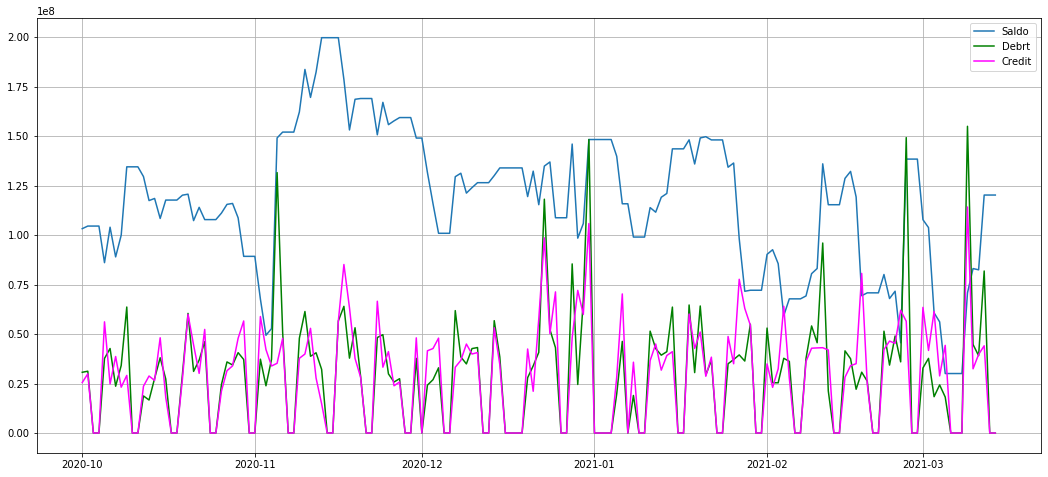

In [10]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.dt, df.saldo) 
ax.plot(df.dt, df.debet,  c='g') 
ax.plot(df.dt, df.credit,  c='magenta') 
ax.legend(['Saldo', 'Debrt', 'Credit'])
ax.grid()

In [17]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.dt, y=df.saldo, mode='lines', name='Сальдо'))
fig.add_trace(go.Scatter(x=df.dt, y=df.debet, mode='lines', name='Дебет'))
fig.add_trace(go.Scatter(x=df.dt, y=df.credit, mode='lines', name='Кредит'))

fig.update_layout(
    title="Наличность в кассе ТАЛДЫКОРГАНСКИЙ ФИЛИАЛ",
    xaxis_title="Время",
    yaxis_title="Сумма",
    legend_title="Виды сумм",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show() 